# Using Least Squares Fitting to Calculate the Hubble Constant

We will be using numerous methods of weighted and unweighted least squares fitting in python to calculate the Hubble constant using data from Betoule et al (2014) which is post processed by Dr Pablo Lemos Portela. 

In [105]:

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

The code cell above imports the relevant modules of python to allow for some calculations to be done.

### 1(a) and (b):

<IPython.core.display.Javascript object>


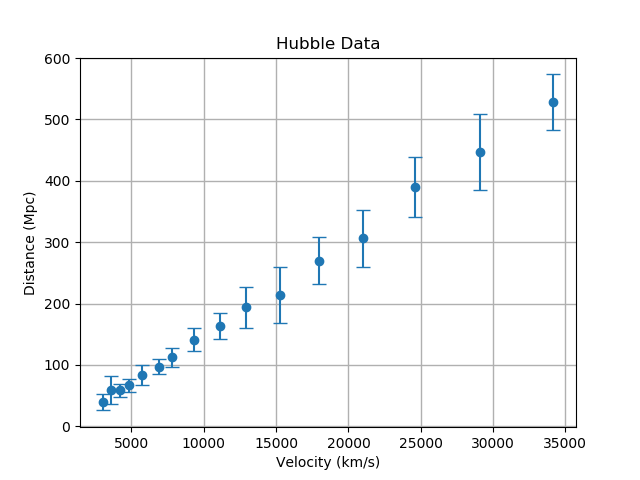

Text(0.5, 1.0, 'Hubble Data')

In [106]:
vel, dis, errdis = np.loadtxt("hubble_data.csv", delimiter=',', skiprows=2, unpack=True) #imports the data from the text 
#file and assigns it to the named variables. skiprows is used to skip the first two rows in the text file as it contains string information
#the following code plots the data with error bars
plt.figure()
plt.grid(linewidth="1")
plt.errorbar(vel, dis, yerr=errdis, capsize=5, fmt='o')
plt.xlabel("Velocity (km/s)")
plt.ylabel("Distance (Mpc)")
plt.title("Hubble Data")

This code cell plots the imported data with error bars.

### Calculating least squares fitting method 1:
#### 1(c):

In [107]:
xmean=np.mean(vel) #calculates the mean of the x values (velocities)
print("The mean of the velocities is: ", xmean, "kms^-1") #prints the mean of the x values
ymean=np.mean(dis) #calculates the mean of the y values (distances)
print("The mean of the distances is: ", ymean, "Mpc") #prints the mean of the y values
mnum=np.sum(dis*(vel-xmean)) 
mdenom=np.sum((vel-xmean)**2)
#both of these lines of code above calculates the numerator and denominator respectively for the value of m(gradient)
m=mnum/mdenom
n=len(vel) #calculates the number of data points in the x array
print("The number of data points is: ", n)
c=ymean-(m*xmean) #Calculates the y-intercept using the formula shown above
s=np.sum((dis-(m*vel)-c)**2) #calculates the value for 's'
d=np.sum((vel-xmean)**2) #calculates the value of 'd' from the uncertainty equation
deltam = np.sqrt(s/((n-2)*d)) #calculates the uncertainty in m
deltac = np.sqrt(((1/n)+((xmean**2)/d))*(s/(n-2))) #calculates the uncertainty of c
xmin = np.min(vel) #finds the minimum x value
xmax = np.max(vel) #finds the maximum x value
x2 = np.linspace(xmin,xmax,16) #calculates the fitted x values
y2 = m*vel + c #calculates the fitted y values
print("The calculated value of the unweighted fitted gradient is:", m, "Mpc km^-1 s")
print("The uncertainty in the gradient is:", deltam, "Mpc km^-1 s")
print("The calculated value of the unweighted fitted y-intercept is:", c, "Mpc")
print("The uncertainty in the y-intercept is:", deltac, "Mpc")

The mean of the velocities is:  13209.605181125 kms^-1
The mean of the distances is:  198.164963231875 Mpc
The number of data points is:  16
The calculated value of the unweighted fitted gradient is: 0.015581875025882402 Mpc km^-1 s
The uncertainty in the gradient is: 0.00020781768553829066 Mpc km^-1 s
The calculated value of the unweighted fitted y-intercept is: -7.665453841663435 Mpc
The uncertainty in the y-intercept is: 3.364858211387227 Mpc


The code above is from PHAS0007 Computing Session 5 (19071871). In the code above we calculate the fitted values of the gradient ('m'), the y-intercept ('c') and their respective uncertainties.

#### 1(d):

In [108]:
w=1/(errdis**2) #calculates the weights from the errors in y
#the following code is used to calculate all the variables needed to calculated the unweighted fit of the data
sumw=np.sum(w)
sumwxy=np.sum(w*vel*dis)
sumwx=np.sum(w*vel)
sumwy=np.sum(w*dis)
sumwx2=np.sum(w*(vel**2))
delta=((sumw*sumwx2)-(sumwx**2))
print("The value of delta is:", delta)
m2num=(sumw*sumwxy)-(sumwx*sumwy)
m2=m2num/delta
print("The calculated value of the gradient using weighted least square fitting is:", m2, "Mpc km^-1 s")
c2num=(sumwx2*sumwy)-(sumwx*sumwxy)
c2=c2num/delta
print("The calculated value of the y-intercept using weighted least square fitting is:", c2, "Mpc")
deltam2=np.sqrt((sumw/delta))
print("The uncertainty in the gradient to full precision is:", deltam2, "Mpc km^-1 s")
deltac2=np.sqrt((sumwx2/delta))
print("The uncertainty in the y-intercept to full precision is:", deltac2, "Mpc")

The value of delta is: 53861.91677735992
The calculated value of the gradient using weighted least square fitting is: 0.015502698613504395 Mpc km^-1 s
The calculated value of the y-intercept using weighted least square fitting is: -6.881414116663961 Mpc
The uncertainty in the gradient to full precision is: 0.0009401002347956379 Mpc km^-1 s
The uncertainty in the y-intercept to full precision is: 7.858500366636018 Mpc


The code cell above is using the equations from the Supplementary Notebook (Dash and Lemos 2019) and is using 
equations 2 to 8 to manually calculate the weighted least squares fitting of the data

### Calculating least squares fitting method 2:
#### 2(a) and (b):

In [109]:
degree=1 #sets the degree of the polynomial used for the fitting which is our case is 1
fit, cvm = np.polyfit(vel, dis, degree, cov='scaled') #calculates the covariance matrix for the velocity and displacement data
#also in the code line above, cov is set to scaled which ignores any weights (treats them as unreliable) which is what we want for the unweighted fit of data
dfit = [np.sqrt(cvm[i,i]) for i in range(2)] #calculates the uncertainties from the covariance matrix

yWeights = 1/errdis #defines the weights of the data for the polyfit function
fitweight, cvmweight = np.polyfit(vel,dis,degree,w=yWeights,cov='unscaled')
# Outputs and errors of fitted parameters are same as before.
dfitweight = [np.sqrt(cvmweight[i,i]) for i in range(2)]
# Print fit parameters with their errors (to 2 decimal places):


print(u"Gradient (Unweighted) =", fit[0], "\xb1", dfit[0], "Mpc km^-1 s")
print(u"y-intercept (Unweighted) =", fit[1], "\xb1", dfit[1], "Mpc")
print(u"Gradient (Weighted) =", fitweight[0], "\xb1", dfitweight[0], "Mpc km^-1 s")
print(u"y-intercept (Weighted) =", fitweight[1], "\xb1", dfitweight[1], "Mpc")


Gradient (Unweighted) = 0.015581875025882404 ± 0.00020781768553829053 Mpc km^-1 s
y-intercept (Unweighted) = -7.665453841663421 ± 3.364858211387225 Mpc
Gradient (Weighted) = 0.015502698613504406 ± 0.0009401002347956375 Mpc km^-1 s
y-intercept (Weighted) = -6.881414116663806 ± 7.858500366636014 Mpc


The code above is from the "Linear regression in Python" script by Dr. I. Llorente-Garcia, UCL Dept. of Physics and Astronomy. 

### Calculating least sqaures fitting method 3
#### 3(a):

In [110]:
### Use scipy's curve_fit function to fit the data
### Louise Dash, October 2019
###

from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize

#the following code defines a function and states what the function does with it's inputs which in our case is to calculate 
#the y values from the gradient, x values and the intercept provided
def straight_line(x,m,c):
    """Calculates a straight line y = mx+c
    Inputs: x value (or set of x values)
            gradient of straight line m
            y-intercept of straight line c
    Returns: the corresponding y value(s)"""
    y = m*x + c # equation for straight line
    return y #states that the output of the function are y values

# Unweighted fit:
# poptUW: Optimized parameters for the unweighted fit
# pcovUW: matrix of covariance for the unweighted fit  
poptUW,pcovUW = curve_fit(straight_line,vel,dis)
perruw = np.sqrt(np.diag(pcovUW)) #computes standard deviation errors on the diagonal parameters in the 
#covariance matrix giving us the error in the y intercept and gradient. This code is from docs.scipy.org
print("The unweighted gradient is =", poptUW[0], "Mpc km^-1 s")
print("The uncertainty in the unweighted gradient is =", perruw[0], "Mpc km^-1 s")
print("The unweighted y-intercept is =", poptUW[1], "Mpc")
print("The uncertainty in the unweighted y-intercept is =", perruw[1])
print()


# Weighted fit
# poptW: Optimized parameters for the weighted fit
# pcovW: matrix of covariance for the weighted fit 
poptW,pcovW = curve_fit(straight_line,vel,dis, sigma=errdis, absolute_sigma=True) #in the weighted calculations, 
#the error (sigma) is assigned to the y errors imported from the data and absolute_sigma is set to true to use the 
#absolute values of sigma
perrw = np.sqrt(np.diag(pcovW))
print("The weighted gradient is =", poptW[0], "Mpc km^-1 s")
print("The uncertainty in the weighted gradient is =", perrw[0], "Mpc km^-1 s")
print("The weighted y-intercept is =", poptW[1], "Mpc")
print("The uncertainty in the weighted y-intercept is =", perrw[1])

The unweighted gradient is = 0.015581874993853734 Mpc km^-1 s
The uncertainty in the unweighted gradient is = 0.00020781773315223018 Mpc km^-1 s
The unweighted y-intercept is = -7.665453210233705 Mpc
The uncertainty in the unweighted y-intercept is = 3.3648587430897554

The weighted gradient is = 0.015502698594656278 Mpc km^-1 s
The uncertainty in the weighted gradient is = 0.0009401002203658244 Mpc km^-1 s
The weighted y-intercept is = -6.881413924365953 Mpc
The uncertainty in the weighted y-intercept is = 7.858500568411607


The code above is from the Supplementary Notebook (Dash and Lemos 2019). It also contains code form https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html. 

#### 3(b):

The covariance matrix contains the value of covaraince between the variables in the data. Each cell of the matrix contains the covariance of the two adjoining variables eg, the 'x y' cell contains the covariance of x and y. If the cell is adjoining the same variable eg, the 'x x' cell, it will show the variance of that variable (in this case x). Covariance is the measure of difference in the values of the the variables. If one variable tends to have less values than the other (x values are less than y) then the covariance of (x,y) will be negative and the covariance of (y,x) will be positive. <br>
Sources:
<br>
https://www.youtube.com/watch?v=0GzMcUy7ZI0
<br>
https://en.wikipedia.org/wiki/Covariance

### All of the results from the different methods used above:
#### 4(a):

In [111]:
print("The results for the calculated unweighted fitted data are: \n", "Gradient =", m, "Mpc km^-1 s", "\t Uncertainty = \xb1", deltam, "Mpc km^-1 s", "\n Y-Intercept =", c, "Mpc", "\t \t Uncertainty = \xb1", deltac, "Mpc")
print()
print("The results for the calculated weighted fitted data are: \n", "Gradient =", m2, "Mpc km^-1 s", "\t Uncertainty = \xb1", deltam2, "Mpc km^-1 s", ":\n Y-Intercept =", c2, "Mpc", "\t \t Uncertainty = \xb1", deltac2, "Mpc")
print()
print("The results for the unweighted fitted data using linear regression (method 2) are: \n", "Gradient =", fit[0], "Mpc km^-1 s", "\t Uncertainty = \xb1", dfit[0], "Mpc km^-1 s", "\n Y-Intercept =", fit[1], "Mpc", "\t \t Uncertainty = \xb1", dfit[1], "Mpc")
print()
print("The results for the weighted fitted data using linear regression (method 2) are: \n", "Gradient =", fitweight[0], "Mpc km^-1 s", "\t Uncertainty = \xb1", dfitweight[0], "Mpc km^-1 s", "\n Y-Intercept =", fitweight[1], "Mpc", "\t \t Uncertainty = \xb1", dfitweight[1], "Mpc")
print()
print("The results for the unweighted fitted data using the curve_fit function (method 3) are: \n", "Gradient =", poptUW[0], "Mpc km^-1 s", "\t Uncertainty = \xb1", perruw[0], "Mpc km^-1 s", "\n Y-Intercept =", poptUW[1], "Mpc", "\t \t Uncertainty = \xb1", perruw[1], "Mpc")
print()
print("The results for the weighted fitted data using the curve_fit function (method 3) are: \n", "Gradient =", poptW[0], "Mpc km^-1 s", "\t Uncertainty = \xb1", perrw[0], "Mpc km^-1 s", "\n Y-Intercept =", poptW[1], "Mpc", "\t \t Uncertainty = \xb1", perrw[1], "Mpc")

The results for the calculated unweighted fitted data are: 
 Gradient = 0.015581875025882402 Mpc km^-1 s 	 Uncertainty = ± 0.00020781768553829066 Mpc km^-1 s 
 Y-Intercept = -7.665453841663435 Mpc 	 	 Uncertainty = ± 3.364858211387227 Mpc

The results for the calculated weighted fitted data are: 
 Gradient = 0.015502698613504395 Mpc km^-1 s 	 Uncertainty = ± 0.0009401002347956379 Mpc km^-1 s :
 Y-Intercept = -6.881414116663961 Mpc 	 	 Uncertainty = ± 7.858500366636018 Mpc

The results for the unweighted fitted data using linear regression (method 2) are: 
 Gradient = 0.015581875025882404 Mpc km^-1 s 	 Uncertainty = ± 0.00020781768553829053 Mpc km^-1 s 
 Y-Intercept = -7.665453841663421 Mpc 	 	 Uncertainty = ± 3.364858211387225 Mpc

The results for the weighted fitted data using linear regression (method 2) are: 
 Gradient = 0.015502698613504406 Mpc km^-1 s 	 Uncertainty = ± 0.0009401002347956375 Mpc km^-1 s 
 Y-Intercept = -6.881414116663806 Mpc 	 	 Uncertainty = ± 7.858500366636014 Mp

### Choice of results:
#### 4(b):

In [112]:
print("The results I have chosen are:")
print("The results for the unweighted fitted data using linear regression (method 2) are: \n", "Gradient =", fit[0], "Mpc km^-1 s", "\t Uncertainty = \xb1", dfit[0], "Mpc km^-1 s", "\n Y-Intercept =", fit[1], "Mpc", "\t \t Uncertainty = \xb1", dfit[1], "Mpc")
print()
print("The results for the weighted fitted data using linear regression (method 2) are: \n", "Gradient =", fitweight[0], "Mpc km^-1 s", "\t Uncertainty = \xb1", dfitweight[0], "Mpc km^-1 s", "\n Y-Intercept =", fitweight[1], "Mpc", "\t \t Uncertainty = \xb1", dfitweight[1], "Mpc")

The results I have chosen are:
The results for the unweighted fitted data using linear regression (method 2) are: 
 Gradient = 0.015581875025882404 Mpc km^-1 s 	 Uncertainty = ± 0.00020781768553829053 Mpc km^-1 s 
 Y-Intercept = -7.665453841663421 Mpc 	 	 Uncertainty = ± 3.364858211387225 Mpc

The results for the weighted fitted data using linear regression (method 2) are: 
 Gradient = 0.015502698613504406 Mpc km^-1 s 	 Uncertainty = ± 0.0009401002347956375 Mpc km^-1 s 
 Y-Intercept = -6.881414116663806 Mpc 	 	 Uncertainty = ± 7.858500366636014 Mpc


I have chosen the results from method 2 as it is the fastest and most convenient method to use requiring the least amount of code.This also reduces the chance of making errors compared to method 1 which is the simplest but has a lot of code making it hard to debug. Method 3

### Calculating and plotting residuals:

#### 4(c):

<IPython.core.display.Javascript object>


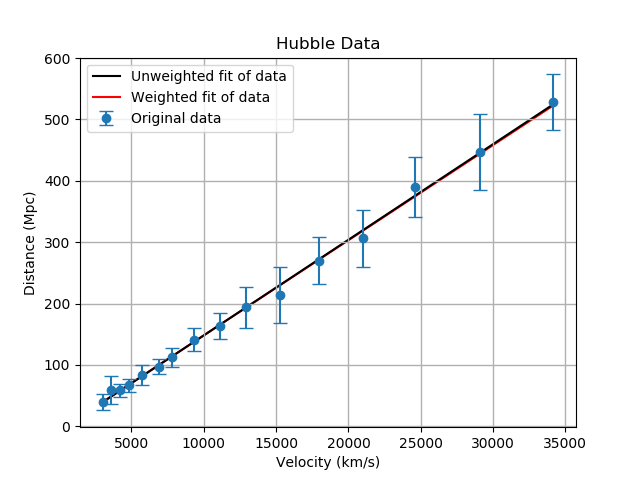

In [113]:
plt.figure()
plt.grid(linewidth="1")
plt.errorbar(vel, dis, yerr=errdis, capsize=5, fmt='o', label="Original data")
#the following code calculates the y values for the weighted fit using the gradient and y-intercept values calculated 
#in method 2 for the weighted fit and adds it to the graph coded in 1(b)
yuw = (fit[0]*vel)+fit[1]
yw = (fitweight[0]*vel)+fitweight[1]
plt.plot(vel, yuw, zorder=-1, color="black", label="Unweighted fit of data") #zorder just states the order at which the 
#lines are plotted on the graph where a lower number means it is plotted first
plt.plot(vel, yw, zorder=-2, color="red", label="Weighted fit of data")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Distance (Mpc)")
plt.title("Hubble Data")
plt.legend(loc='best')

#### 4(d):

In [114]:
print("The value of the unweighted, fitted gradient is: {0:.4f}".format(fit[0]), "Mpc km^-1 s")
print("The value of the uncertainty in the unweighted, fitted gradient is: \xb1 {0:.4f}".format(dfit[0]), "Mpc km^-1 s")
print("The value of the unweighted, fitted y-intercept is: {0:.1f}".format(fit[1]), "Mpc")
print("The value of the uncertainty in the unweighted, fitted y-intercept is: \xb1 {0:.1f}".format(dfit[1]), "Mpc")
print("The value of the weighted, fitted gradient is: {0:.4f}".format(fitweight[0]), "Mpc km^-1 s")
print("The value of the uncertainty in the weighted, fitted gradient is: \xb1 {0:.4f}".format(dfitweight[0]), "Mpc km^-1 s")
print("The value of the weighted, fitted y-intercept is: {0:.1f}".format(fitweight[1]), "Mpc")
print("The value of the uncertainty in the weighted, fitted y-intercept is: \xb1 {0:.1f}".format(dfitweight[1]), "Mpc")

The value of the unweighted, fitted gradient is: 0.0156 Mpc km^-1 s
The value of the uncertainty in the unweighted, fitted gradient is: ± 0.0002 Mpc km^-1 s
The value of the unweighted, fitted y-intercept is: -7.7 Mpc
The value of the uncertainty in the unweighted, fitted y-intercept is: ± 3.4 Mpc
The value of the weighted, fitted gradient is: 0.0155 Mpc km^-1 s
The value of the uncertainty in the weighted, fitted gradient is: ± 0.0009 Mpc km^-1 s
The value of the weighted, fitted y-intercept is: -6.9 Mpc
The value of the uncertainty in the weighted, fitted y-intercept is: ± 7.9 Mpc


I decided to round the gradient's value to 4 decimal places to allow for the uncertainty to be present as it's value is only present at 4 or greater decimal places. I rounded the y-intercept to 1 decimal place as it's uncertainty is great so it doesn't make sense to give it a precise value.

#### 4(e):

<IPython.core.display.Javascript object>


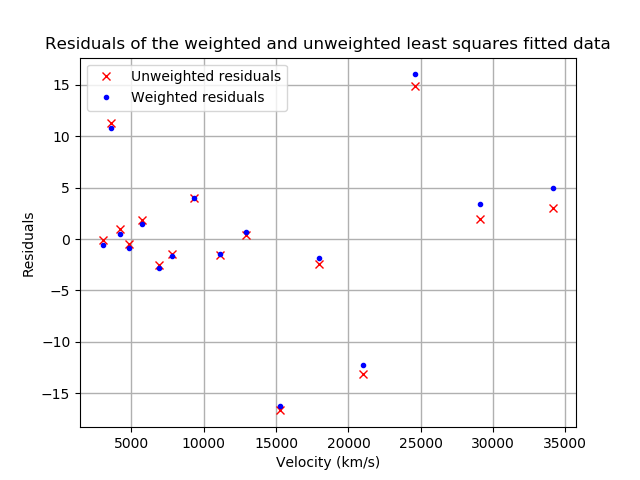

The values of the residuals for the unweighted fit are: 
 [ -0.07361563  11.28564622   0.93848246  -0.43911522   1.83591979
  -2.54398051  -1.47887343   4.0105878   -1.50806185   0.40222039
 -16.66672302  -2.46559991 -13.10677486  14.84885781   1.9000459
   3.06098405]
The values of the residuals for the weighted fit are: 
 [ -0.62029044  10.78644439   0.48675362  -0.84337108   1.5028734
  -2.78208093  -1.64576438   3.9623793   -1.4138514    0.63884979
 -16.24020169  -1.82545016 -12.22926019  16.01121037   3.41844583
   4.98290433]


In [115]:
ruw=(dis-yuw)
rw=(dis-yw)
plt.figure()
plt.grid(linewidth="1")
plt.plot(vel, ruw, 'x', color="red", label="Unweighted residuals")
plt.plot(vel, rw, '.', color="blue", label="Weighted residuals")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Residuals")
plt.title("Residuals of the weighted and unweighted least squares fitted data")
plt.legend(loc='best')
print("The values of the residuals for the unweighted fit are: \n", ruw)
print("The values of the residuals for the weighted fit are: \n", rw)

The residual plot shows us that the value of the residual increases as the value of the velocity increases. Even though some of the data is spread out (due to some great residuals), overall it is appropirate to use straight line fit for this data as shown by the graph in part 4(c) where both fitted lines go through or very close to the original data points and their errors.

### Calculating Hubbles constant
#### 5

Equation 1 from the Supplementary notebook (Dash and Lemos 2019) states: <br>
Equation (1):
$$ v = H_0 D $$
<br>
which we can rearrange to get the value for the Hubble's constant:
$$ H_0 = \frac{v}{D} $$
<br>
However, earlier we calculated the gradient of our D against v graph, whose gradient is the reciprocal of the equation above. So to calculate Hubble's constant, we take the reciprocal of the weighted and unweighted fitted gradients as done so in the code cell below. 
<br>
Source for the MathJax code: https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference


In [116]:
h0uw=1/fit[0]
h0uwunc=(1/(fit[0]**2))*dfit[0] #equation which propagates the error for the uncertainty of the hubble's constant (one variable)
h0w=1/fitweight[0]
h0wunc=(1/(fitweight[0]**2))*dfitweight[0]
print("The calculated Hubble's constant using the unweighted fitted data is:", h0uw, "\xb1", h0uwunc, "Mpc^-1 km s^-1")
print("Rounded to 1 decimal place this value is: {0:.1f}".format(h0uw), "\xb1","{0:.1f}".format(h0uwunc), "Mpc^-1 km s^-1")
print("The calculated Hubble's constant using the weighted fitted data is:", h0w, "\xb1", h0wunc, "Mpc^-1 km s^-1")
print("Rounded to 1 decimal place this value is: {0:.1f}".format(h0w), "\xb1","{0:.1f}".format(h0wunc), "Mpc^-1 km s^-1")

The calculated Hubble's constant using the unweighted fitted data is: 64.17712876909496 ± 0.8559395029887215 Mpc^-1 km s^-1
Rounded to 1 decimal place this value is: 64.2 ± 0.9 Mpc^-1 km s^-1
The calculated Hubble's constant using the weighted fitted data is: 64.50489846515494 ± 3.9116460755894757 Mpc^-1 km s^-1
Rounded to 1 decimal place this value is: 64.5 ± 3.9 Mpc^-1 km s^-1


From the calculated values of the Hubble's constant, the one calculated from the unweighted fitted data is better as it's uncertainty is lower (+- 0.9 compared to the uncertainty of the fitted +- 3.9). Although, it is a bit further away from the 'true' value of Hubble's constant (70 Mpc^-1 km s^-1) compared to the weighted Hubble's constant, it's lower uncertainty allows it's result to be in a range of values more closer to the 'true' value whereas due to it's uncertainty, the weighted Hubble's constant can be as low as 60.4 making it much further away from the 'true' value.

#### 6

The significance of the hubble's constant for our universe is that it tell us the rate at which the universe is expanding at different distances away from us. The further away something is away from us in the universe, the faster it is moving away (the greater the rate of expansion of the universe). The Hubble's constant could also be used to calculate Hubble's time which is just the reciprocal of the Hubble's constant. Hubble's time is the age of the universe if the universe's expansion had been linear which it is not  (Hubble's time is 14.4 billion years and the age of the universe is 13.8 billion years). It could also be used to calculate the Hubble's length, which is the speed of light (c) multiplied by the Hubble time (which is 4550 Mpc). This tells us the distance between the earth and a far away galaxy which is receeding away from us at the speed of light. Hubble's constant could also be used to calculate Hubble's volume which is referred to as the volume of the universe.
<br>
Source: https://en.wikipedia.org/wiki/Hubble%27s_law